In this file, the goal is to see how the predicted abnormal data points are located in the latent space (if there are some clusters)

In [60]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
import seaborn as sns
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [61]:

reducer = umap.UMAP(n_components=2, random_state=42)

In [62]:
Embeddings_UKB= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/Embeddings.csv")
Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/hcp/Embeddings.csv")
Embeddings_epilepsy= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/epilepsy_PBS/Embeddings.csv")

In [63]:
Participants_epilepsy=pd.read_csv("/neurospin/dico/data/human/epilepsy_PBS/participants.tsv", sep="\t")

In [64]:
epilepsy_controls= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="controls"]
epilepsy_irm_neg= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_negatives_centrales"]
epilepsy_irm_pos= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_positives_centrales"]

In [65]:
#We rename the first colomn 

Embeddings_epilepsy  = Embeddings_epilepsy.rename(columns={Embeddings_epilepsy.columns[0]: "Index"})
Embeddings_UKB  = Embeddings_UKB.rename(columns={Embeddings_UKB.columns[0]: "Index"})

In [66]:
mask= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/mask_interrupted_cs.csv")

In [67]:
mask=np.array(mask)

In [68]:
mask =mask.flatten()

In [69]:
Embeddings_interrupted_cs= Embeddings_UKB[mask]
Embeddings_UKB= Embeddings_UKB[~mask]


In [70]:
Embeddings_controls = Embeddings_epilepsy.merge(epilepsy_controls[["Index"]], on="Index", how="inner")
Embeddings_irm_negatives = Embeddings_epilepsy.merge(epilepsy_irm_neg[["Index"]], on="Index", how="inner")
Embeddings_irm_positives = Embeddings_epilepsy.merge(epilepsy_irm_pos[["Index"]], on="Index", how="inner")

In [71]:
X1 = Embeddings_UKB.iloc[:,1:76] #We remove de first column because it represents the id
                                 #1:76 because there are 75 components
X2= Embeddings_HCP.iloc[:,1:76]
X3= Embeddings_controls.iloc[:,1:76]
X4= Embeddings_irm_negatives.iloc[:,1:76]
X5= Embeddings_irm_positives.iloc[:,1:76]
X6= Embeddings_interrupted_cs.iloc[:,1:76]

In [72]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X2=scaler.transform(X2)
X3=scaler.transform(X3)
X4=scaler.transform(X4)
X5=scaler.transform(X5)
X6=scaler.transform(X6)

UMAP

In [73]:
reducer = umap.UMAP(n_components=2, random_state=42)
X1_umap1 = reducer.fit_transform(X1)
X2_umap1 = reducer.transform(X2)
X3_umap1= reducer.transform(X3)
X4_umap1=reducer.transform(X4)
X5_umap1=reducer.transform(X5)
X6_umap1=reducer.transform(X6)

/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


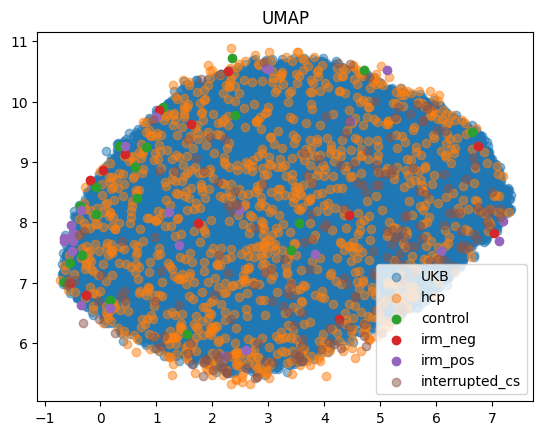

In [74]:
plt.scatter(X1_umap1[:,0], X1_umap1[:,1], alpha=0.5, label="UKB")
plt.scatter(X2_umap1[:,0], X2_umap1[:,1], alpha=0.5, label="hcp")
plt.scatter(X3_umap1[:,0], X3_umap1[:,1], label="control")
plt.scatter(X4_umap1[:,0], X4_umap1[:,1], label="irm_neg")
plt.scatter(X5_umap1[:,0], X5_umap1[:,1] , label="irm_pos")
plt.scatter(X6_umap1[:,0], X6_umap1[:,1], alpha=0.5, label="interrupted_cs")

plt.legend()
plt.title('UMAP')
plt.show()

In [75]:
datasets = [X1, X2, X3, X4, X5, X6]
X_all = np.vstack(datasets)

y_true = np.concatenate([[0]*(len(X1)+len(X2)+len(X3)) +[1]*(len(X4)+len(X5))+ [0]*len(X6)])  #true label

In [76]:
y_true

array([0, 0, 0, ..., 0, 0, 0], shape=(43604,))

In [77]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_all)


/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [78]:
X1_umap2 = X_umap[:len(X1),:]
X2_umap2 = X_umap[len(X1):len(X1)+len(X2),:]
X3_umap2= X_umap[len(X1)+len(X2):len(X1)+len(X2)+len(X3),:]
X4_umap2= X_umap[len(X1)+len(X2)+len(X3):len(X1)+len(X2)+len(X3)+len(X4),:]
X5_umap2=X_umap[len(X1)+len(X2)+len(X3)+len(X4):len(X1)+len(X2)+len(X3)+len(X4)+len(X5),:]
X6_umap2=X_umap[len(X1)+len(X2)+len(X3)+len(X4)+len(X5):,:]

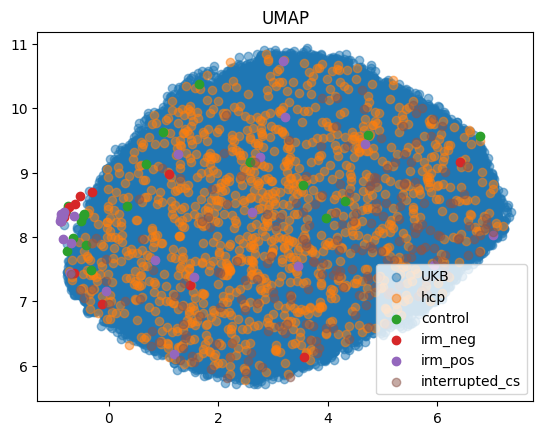

In [79]:
plt.scatter(X1_umap2[:,0], X1_umap2[:,1], alpha=0.5, label="UKB")
plt.scatter(X2_umap2[:,0], X2_umap2[:,1], alpha=0.5, label="hcp")
plt.scatter(X3_umap2[:,0], X3_umap2[:,1], label="control")
plt.scatter(X4_umap2[:,0], X4_umap2[:,1], label="irm_neg")
plt.scatter(X5_umap2[:,0], X5_umap2[:,1] , label="irm_pos")
plt.scatter(X6_umap2[:,0], X6_umap2[:,1], alpha=0.5, label="interrupted_cs")

plt.legend()
plt.title('UMAP')
plt.show()

In [80]:
X_umap1= np.concatenate((X1_umap1, X2_umap1, X3_umap1, X4_umap1, X5_umap1, X6_umap1), axis=0)
X_umap2= np.concatenate((X1_umap2, X2_umap2, X3_umap2, X4_umap2, X5_umap2, X6_umap2), axis=0) # = X_umap

Clustering

In [81]:
from k_means_constrained import KMeansConstrained

In [83]:

n_clusters = 2
a = (len(X1)+len(X2)+len(X3)+len(X6)) / len(X_all)
proportions = [a, 1 - a]
sizes = [int(p * len(X_all)) for p in proportions]


clf = KMeansConstrained(
    n_clusters=2,
    size_min=min(sizes),
    size_max=max(sizes),   # contrainte quasi fixe
    random_state=42
)

y_pred = clf.fit_predict(X_all)


In [ ]:
a

0.9991285203192367

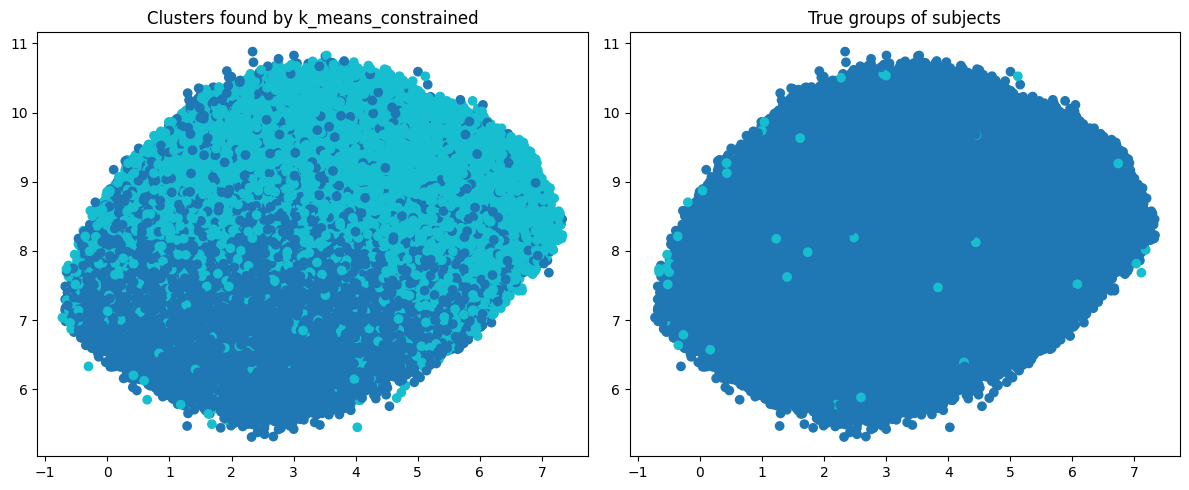

In [84]:
plt.figure(figsize=(12,5))

# Clusters found by clustering
plt.subplot(1,2,1)
plt.scatter(X_umap1[:,0], X_umap1[:,1], c=y_pred, cmap='tab10')
plt.title("Clusters found by k_means_constrained")

# true
plt.subplot(1,2,2)
plt.scatter(X_umap1[:,0], X_umap1[:,1], c=y_true, cmap='tab10')
plt.title("True groups of subjects")

plt.tight_layout()
plt.show()

In [85]:
n_clusters = 2
a = (len(X1)+len(X2)+len(X3)+len(X6)) / len(X_all)
proportions = [a, 1 - a]
sizes = [int(p * len(X_all)) for p in proportions]


clf = KMeansConstrained(
    n_clusters=2,
    size_min=min(sizes),
    size_max=max(sizes),   # contrainte quasi fixe
    random_state=42
)

y_pred = clf.fit_predict(X_umap1)

In [87]:
sizes

[43566, 38]

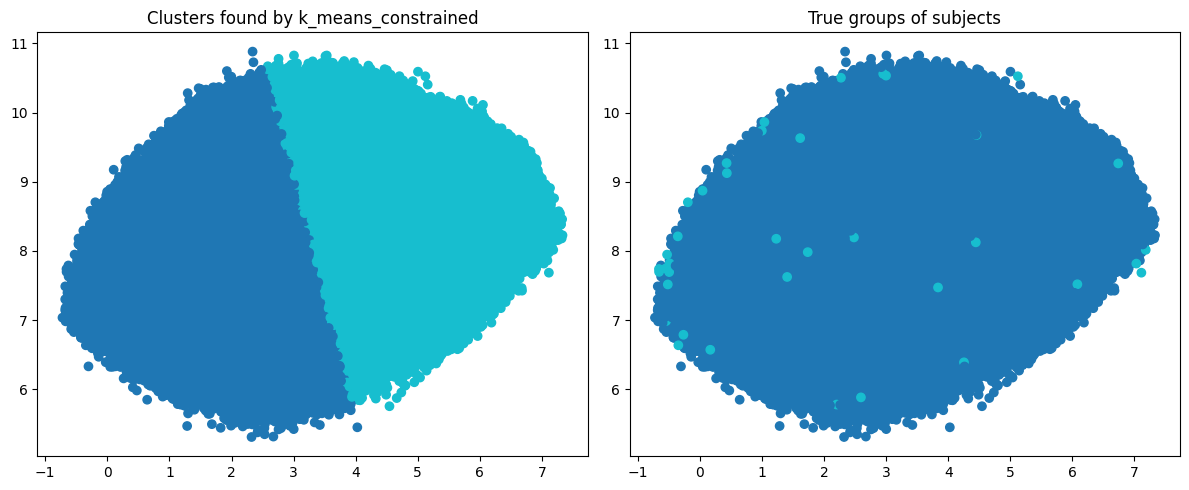

In [86]:
plt.figure(figsize=(12,5))

# Clusters found by clustering
plt.subplot(1,2,1)
plt.scatter(X_umap1[:,0], X_umap1[:,1], c=y_pred, cmap='tab10')
plt.title("Clusters found by k_means_constrained")

# true
plt.subplot(1,2,2)
plt.scatter(X_umap1[:,0], X_umap1[:,1], c=y_true, cmap='tab10')
plt.title("True groups of subjects")

plt.tight_layout()
plt.show()

In [88]:
n_clusters = 2
a = (len(X1)+len(X2)+len(X3)+len(X6)) / len(X_all)
proportions = [a, 1 - a]
sizes = [int(p * len(X_all)) for p in proportions]


clf = KMeansConstrained(
    n_clusters=2,
    size_min=min(sizes),
    size_max=max(sizes),   # contrainte quasi fixe
    random_state=42
)

y_pred = clf.fit_predict(X_umap2)

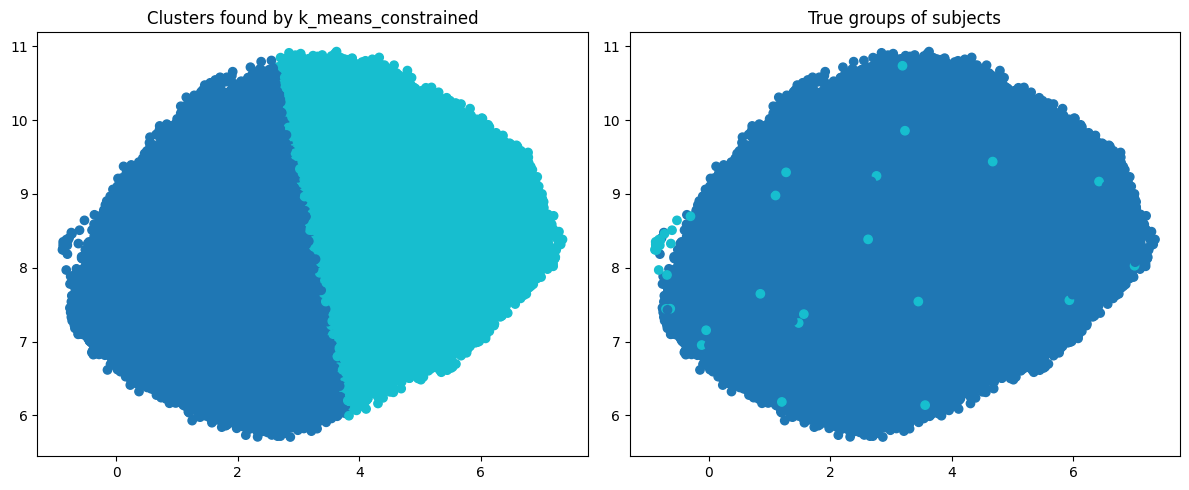

In [89]:
plt.figure(figsize=(12,5))

# Clusters found by clustering
plt.subplot(1,2,1)
plt.scatter(X_umap2[:,0], X_umap2[:,1], c=y_pred, cmap='tab10')
plt.title("Clusters found by k_means_constrained")

# true
plt.subplot(1,2,2)
plt.scatter(X_umap2[:,0], X_umap2[:,1], c=y_true, cmap='tab10')
plt.title("True groups of subjects")

plt.tight_layout()
plt.show()